### 장고 폼

 - 한 가지만 더 하면 그럴듯한 블로그 웹사이트가 완성된다
 
 - 바로 블로그 글을 추가하거나 수정하는 멋진 기능을 추가하는 것이다
 
 - 장고의 `관리자` 기능도 충분히 멋있기는 하지만, 좀 더 입맛에 맞게 바꾸고 예쁘게 꾸미기에는 좀 한계가 있다
 
 - `폼(양식, forms)`으로 강력한 인터페이스를 만들 수 있다
 
 - 이는 우리가 상상할 수 있는 거의 모든 것(?)을 할 수 있게 해준다

 - 장고 폼이 정말 좋은 이유는 아무런 준비 없이도 양식을 만들 수 있으며, `ModelForm`을 생성해 자동으로 모델에 결과물을 저장할 수 있다는 점이다

 - 이 기능이 지금 이번 장에서 해볼 내용이다
 
 - 폼을 하나 만들어서 `Post` 모델에 적용해보자

 - 장고의 모든 중요한 부분과 마찬가지로, 폼도 폼만의 `forms.py` 라는 파일을 만든다

 - 우리는 이 이름으로 `blog` 디렉토리 안에 파일을 만들 것이다
 
```
blog
 └── forms.py
```

 - 이제 이 파일을 열고 아래의 코드를 작성하자

In [ ]:
# blog/forms.py

from django import forms

from .models import Post

class PostForm(forms.ModelForm):

    class Meta:
        model = Post
        fields = ('title', 'text',)

In [1]:
from IPython.display import Image

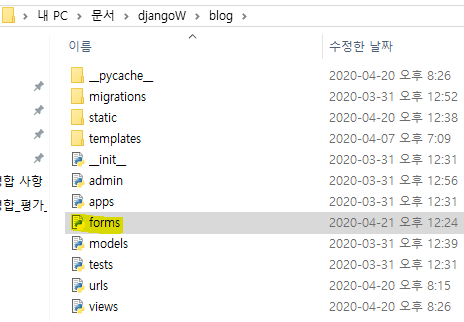

In [4]:
Image("img/33_img.png")

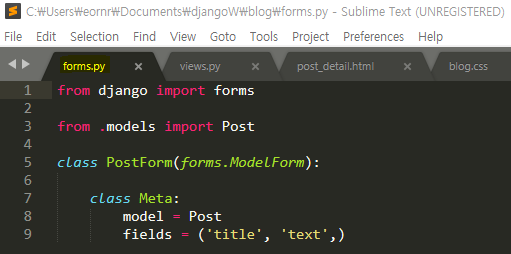

In [5]:
Image("img/34_img.png")

 - 위 코드를 보면 첫 번째로 `forms model`을 `import` 해야 하고 (`from django import forms`), 그 다음으로 `Post model`도 `import` 해야한다 (`from .models import Post`)

 - `PostForm` 은 이미 다들 예상 하셨듯이 우리가 만들 폼의 이름이다
 
 - 그리고 장고에 이 폼이 `ModelForm`이라는 것을 알려주어한다
 
 - `forms.ModelForm`은 `ModelForm`이라는 것을 알려주는 구문이다

 - 자, 이제 다음으로 `class Meta`가 나오는데, 이 구문은 이 폼을 만들기 위해서 어떤 `model`이 쓰여야 하는지 장고에 알려주는 구문이다 (`model = Post`)

 - 마지막으로, 이 폼에 필드를 넣으면 완성될 것이다
 
 - 이번 폼에서는 `title`과 `text`만 보여지게 해보자
 
 - `author`는 현재 로그인 하고 있는 사람이 될 것이고 (바로 당신!) 그리고 `created_date`는 글이 등록되는 시간이 될 것이다

 - `form` 생성을 마쳤다
 
 - 이제 *뷰* 에서 이 *폼*을 사용해 *템플릿* 에서 보여주기만 하면 되네요.

 - 다음에는 *링크*, *URL*, *뷰* 그리고 *템플릿* 을 만들 거에요.

### 폼과 페이지 링크

 - `blog/templates/blog/base.html` 파일을 열어보자
 
 - `page-header` 라는 `div class`에 링크를 하나 추가할 것이다
 
```
<a href="{% url 'post_new' %}" class="top-menu"><span class="glyphicon glyphicon-plus"></span></a>
```

 - 이 새로운 뷰는 `post_new`이다
 
 - 부트스트랩 테마에 있는 `glyphicon glyphicon-plus` 클래스로 더하기 기호가 보이게 된다

 - 위 구문을 추가하고 나면, 이제 `html` 파일이 아래처럼 보일 것이다

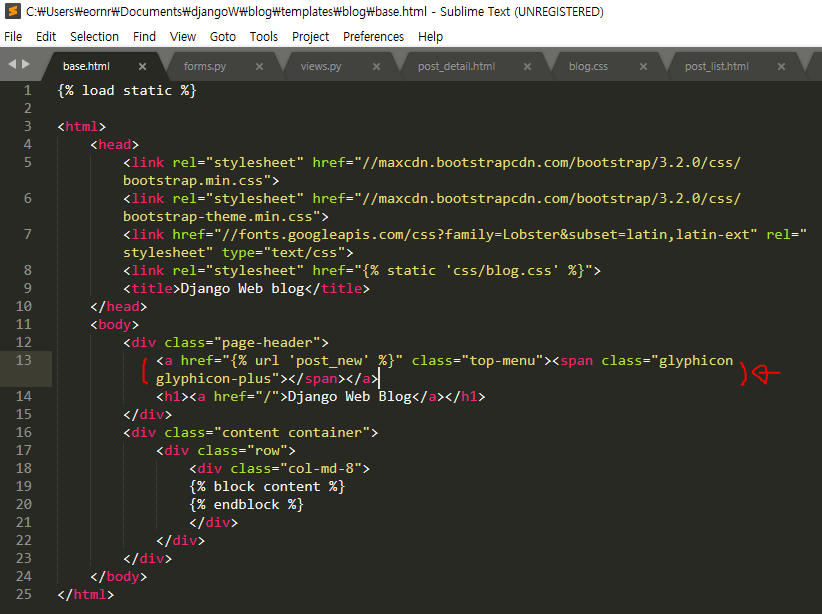

In [6]:
Image("img/35_img.png")

 - 페이지를 저장하고 나서 `http://127.0.0.1:8000` 페이지를 새로고침 해보면, NoReverseMatch이라는 에러가 나타날 것이다

### URL

 - 이제 `blog/urls.py`를 열고 아래 구문을 추가하자
 
```
path('post/new', views.post_new, name='post_new'),
```

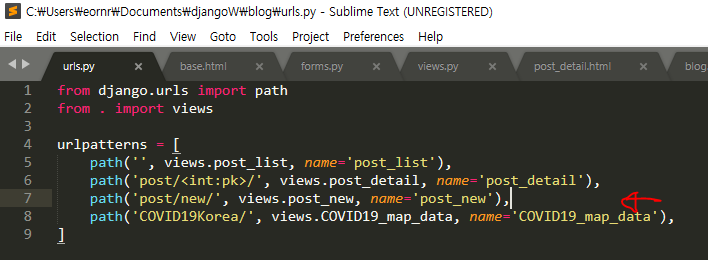

In [7]:
Image("img/36_img.png")

 - 브라우저에 사이트를 다시 불러오면 `AttributeError`가 보이게 된다
 
 - 왜냐하면, 아직 `post_new` *뷰*를 구현하지 않았기 때문이다

### `post_new` view

 - `blog/views.py`파일을 열어서 `from`줄에 아래와 같은 코드를 추가합니다.

```
from .forms import PostForm
```

 - 그리고 `view`에 아래의 내용을 추가한다

```
def post_new(request):
    form = PostForm()
    return render(request, 'blog/post_edit.html', {'form': form})
```

 - 새 `Post` 폼을 추가하기 위해 `PostForm()` 함수를 호출하도록 하여 템플릿에 넘긴다
 
 - 곧 *view* 로 다시 돌아와서 이 작업을 하겠지만, 지금 당장은 폼을 위한 템플릿을 먼저 빨리 만들어보도록 하자

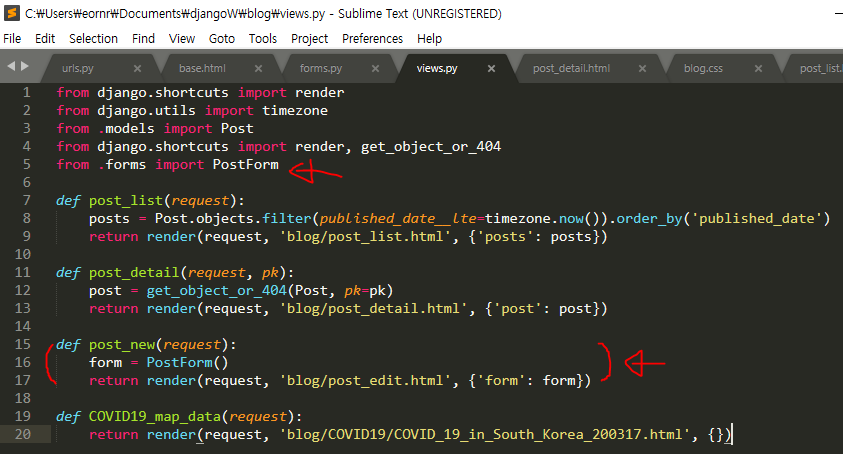

In [8]:
Image("img/37_img.png")

### 템플릿

 - 이번에는 `blog/templates/blog` 디렉터리 안에 `post_edit.html` 파일을 생성해 *폼*이 작동할 수 있게 만들 것이다

 - 먼저 폼이 보여야 합니다. 그 예로, `{{ form.as_p }}`로 간단히 만들 수 있다

 - 위 코드를 `HTML 태그`로 *폼*을 감싸세요. `<form method="POST">...</form>`

 - Save 버튼이 필요한데, 이것은 HTML 버튼으로 만들 수 있다 `<button type="submit">Save</button>`

 - 마지막으로 `<form ...>`을 열어 `{% csrf_token %}`를 추가하자
 
 - 이 작업은 폼 보안을 위해 중요하다
 
 - 결과적으로 `post_edit.html` 파일의 HTML은 아래와 같다
 
```
{% extends 'blog/base.html' %}

{% block content %}
    <h1>New post</h1>
    <form method="POST" class="post-form">{% csrf_token %}
        {{ form.as_p }}
        <button type="submit" class="save btn btn-default">Save</button>
    </form>
{% endblock %}
```

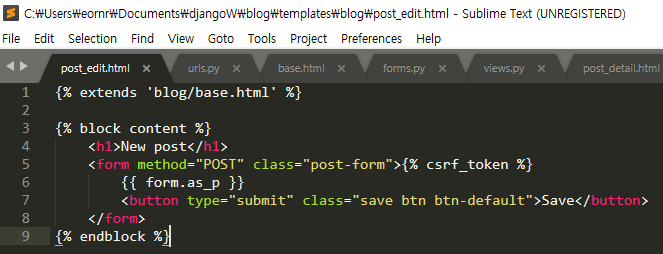

In [9]:
Image("img/38_img.png")

 - `python manage.py runserver`를 실행하면 아래의 그림과 같은 모습을 보여준다

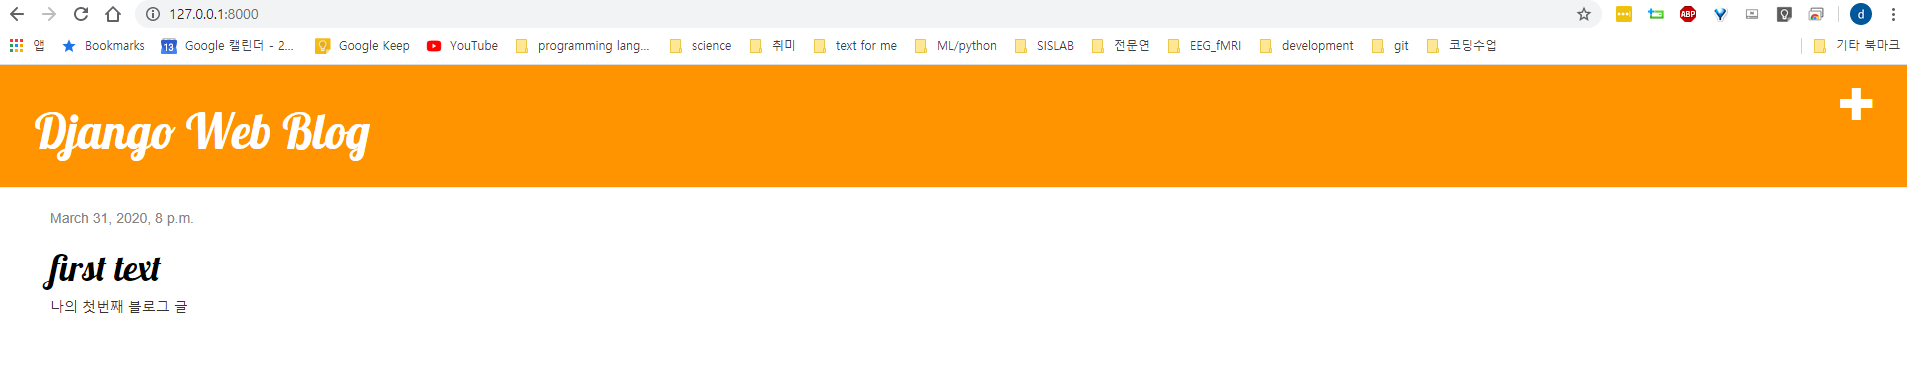

In [10]:
Image("img/39_img.png")

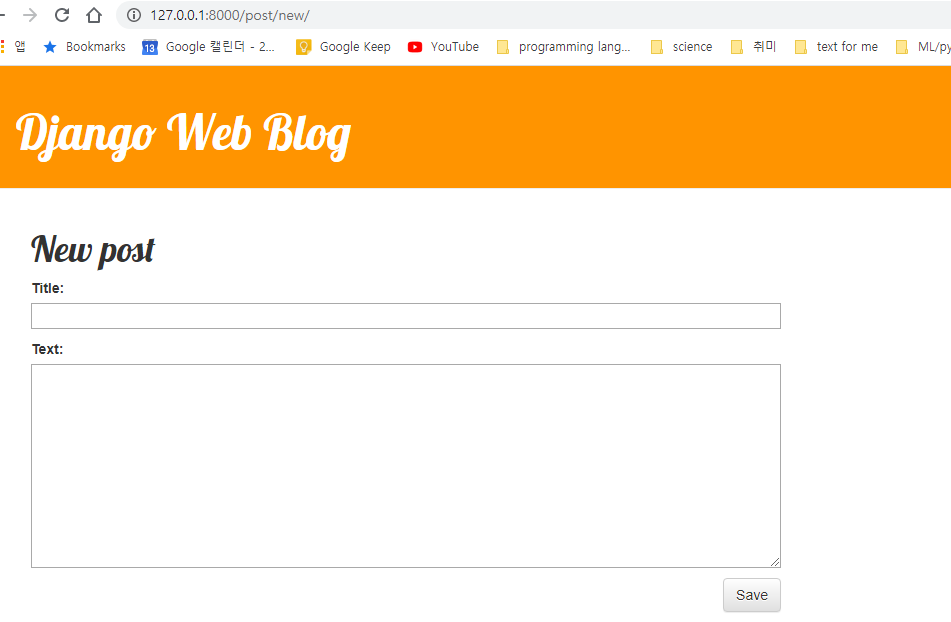

In [11]:
Image("img/40_img.png")

 - 여기서 `title`과 `text`필드에 아무거나 입력하고 저장해보자

 - 글이 사라지게 된다
 
 - 한번 더 해봐도 내가 입력한 글들은 어디론가로 사라지고는 새 글이 추가되지 않는다
 
 - 무엇이 잘못된 것일까?
 
 - 추가적으로 단지 view 작업이 필요할 뿐이다

### 폼 저장하기

 - `blog/views.py`를 다시 열어보자
 
 - 지금 우리가 보고 있는 `post_new` *뷰* 는 아래와 같을 것이다
 
```
def post_new(request):
    form = PostForm()
    return render(request, 'blog/post_edit.html', {'form': form})
```

 - 폼을 제출할 때, 같은 *뷰*를 불러온다
 
 - 이때 `request`에는 우리가 입력했던 데이터들을 가지고 있는데, `request.POST`가 이 데이터를 가지고 있다
 
 - 여기서 `POST`는 글 데이터를 "등록하는(`posting`)"하는 것을 의미한다
 
 > **NOTE** 블로그 "글"을 의미하는 "post"와 관련이 없다!
 
 - HTML에서 `<form>`정의에 `method="POST"`라는 속성이 있던 것을 기억할 것이다
 
 - 이렇게 `POST`로 넘겨진 폼 필드의 값들은 이제 `request.POST`에 저장된다
 
 - `POST`로 된 값을 다른 것으로 바꾸면 안 된다
 
 > **NOTE** `method` 속성의 값으로 넣을 수 있는 유효한 값 중에 `GET`같은 것도 있지만, `post`와 어떤 차이점이 있는지 등에 대해서 다루기에는 너무 길어질 것 같아 생략하기로 한다
 
 - 이제 view 에서 두 상황으로 나누어 처리해보자
 
 1) 첫 번째: 처음 페이지에 접속했을 때이다. 당연히 우리가 새 글을 쓸 수 있게 폼이 비어있어야할 것이다.
 
 2) 두 번째: *폼*에 입력된 데이터를 *view* 페이지로 가지고 올 때이다. 여기서 조건문을 추가시켜야 한다. (if를 사용하자)
 
```
if request.method == "POST":
    [...]
else:
    form = PostForm()
```

 - 이제 생략된 `[...]` 부분에 코드를 추가해보자
 
 - 만약 `method`가 `POST`라면, *폼*에서 받은 데이터를 `PostForm`으로 넘겨주어야한 것이다
 
 - 이렇게 작성하면 된다
 
 `form = PostForm(request.POST)`
 
 - 다음에는 폼에 들어있는 값들이 올바른지를 확인해야한다
 
 - 모든 필드에는 값이 있어야하고 잘못된 값이 있다면 저장해서는 안될 것이다
 
 - 이를 위해 `form.is_valid()`을 사용할 것이다
 
```
if form.is_valid():
    post = form.save(commit=False)
    post.author = request.user
    post.published_date = timezone.now()
    post.save()
```

 - 일반적으로 이 작업을 두 단계로 나눌 수 있다
 
 - `form.save()`로 *폼*을 저장하는 작업과 작성자를 추가하는 작업입니다
 
 - `PostForm`에는 작성자(`author`) 필드가 없지만, 필드 값이 필요하다
 
 - `commit=False` 란 넘겨진 데이터를 바로 `Post` 모델에 저장하지는 말라는 뜻이다
 
 - 왜냐하면, 작성자를 추가한 다음 저장해야 하기 때문이다
 
 - 대부분의 경우에는 `commit=False`를 쓰지 않고 바로 `form.save()`를 사용해서 저장한다
 
 - 다만 여기서는 작성자 정보를 추가하고 저장해야 하므로 `commit=False`를 사용하는 것이다
 
 - `post.save()`는 변경사항(작성자 정보를 포함)을 유지할 것이고 새 블로그 글이 만들어짐을 의미한다
 
 - 끝으로, 새 블로그 글을 작성한 다음에 `post_detail`페이지로 이동할 수 있으면 좋을 것이다
 
 - 이 작업을 하려면 한 가지를 더 불러와야 한다
 
 `from django.shortcuts import redirect`
 
 - 위의 크도를 맨윗줄에 추가하자
 
 - 그리고 새로 작성한 글을 볼 수 있도록 `post_detail` 페이지로 이동하라는 코드를 추가해보자
 
 `return redirect('post_detail', pk=post.pk)`
 
 - `post_detail`은 우리가 이동해야 할 *뷰*의 이름이에요 `post_detail` *뷰* 는 `pk변수`가 필요한 거 기억하고 있을 것이다
 
 - `pk=post.pk`를 사용해서 뷰에게 값을 넘겨줄 것이다
 
 - 여기서 `post`는 새로 생성한 블로그 글을 의미한다

 - 이제 `view` 전체 코드를 확인하자
 
```
def post_new(request):
    if request.method == "POST":
        form = PostForm(request.POST)
        if form.is_valid():
            post = form.save(commit=False)
            post.author = request.user
            post.published_date = timezone.now()
            post.save()
            return redirect('post_detail', pk=post.pk)
    else:
        form = PostForm()
    return render(request, 'blog/post_edit.html', {'form': form})
```

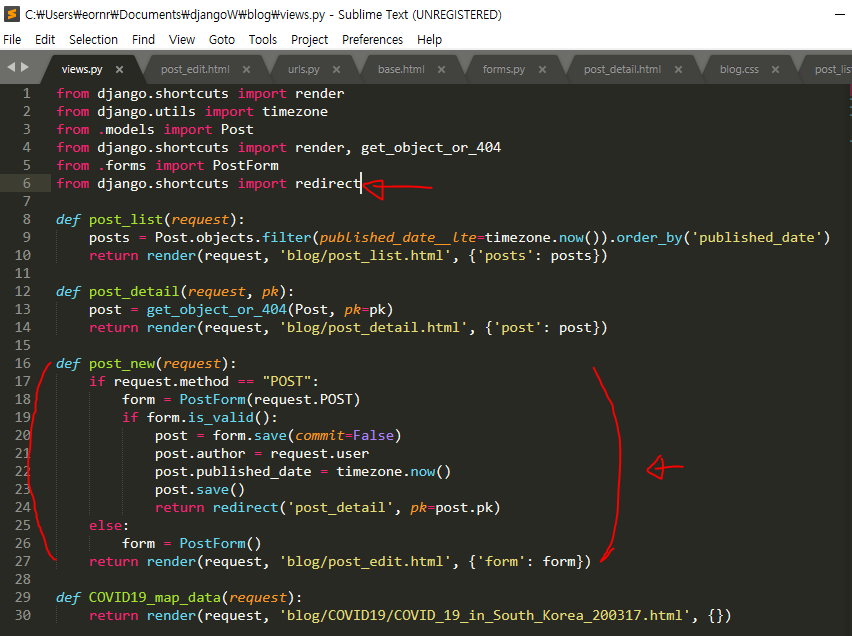

In [13]:
Image("img/41_img.png")

 - 잘 작동하는지 확인해보자
 
 - `http://127.0.0.1:8000/post/new/` 페이지로 접속해서 `title`과 `text`를 입력하고, 저장해보자
 
 - 그리고 새로운 블로그 글이 추가되고 `post_detail`페이지가 나타남을 확인할 수 있다

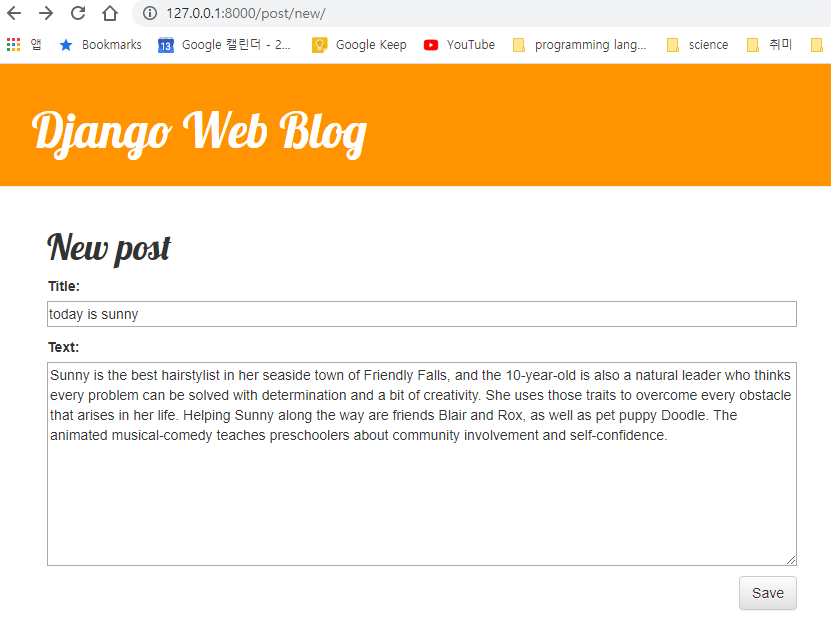

In [14]:
Image("img/42_img.png")

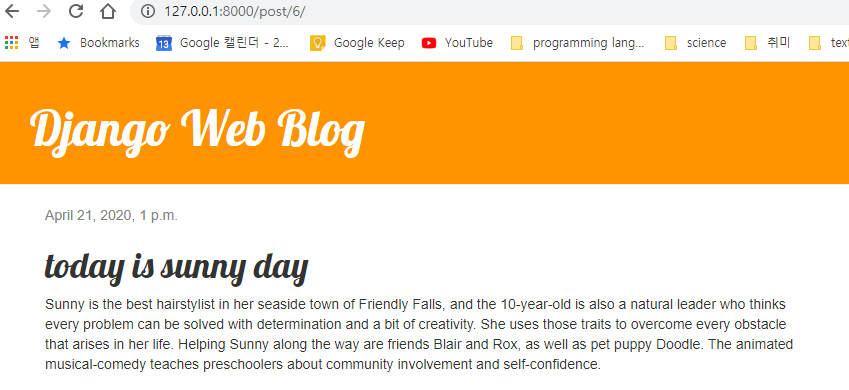

In [15]:
Image("img/43_img.png")

 > **NOTE** 장고 관리자 인터페이스처럼 로그인된 상태라고 생각해보자. 하지만 사용자가 로그아웃되는 상황이 발생하기도 한다. (브라우저가 닫히거나, DB가 재시작된다든가 등) 만약 로그인되지 않은 상태에서 새 글을 저장한다면, 사용자가 로그인되어있지 않아 누가 글을 작성하였는지 알 수 없다. 따라서 이러한 상황에서 글을 저장할 때 오류가 발생한다.

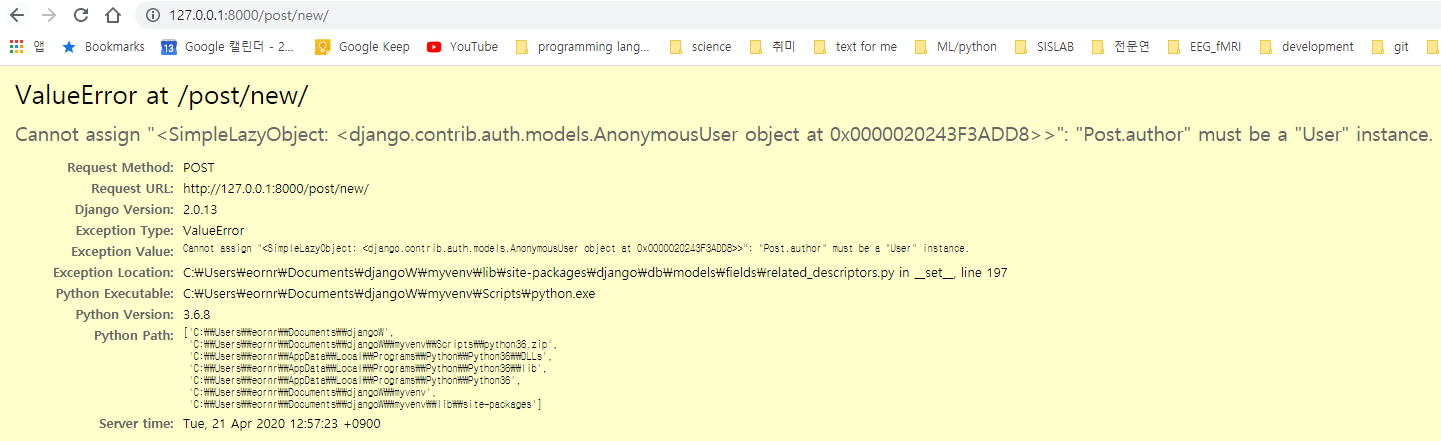

In [16]:
Image("img/44_img.png")